# Deviance of both methods

[ 1.05191266 -0.13168081]
[-0.27516976 -0.21968032]
[-0.7767429   0.35136113]


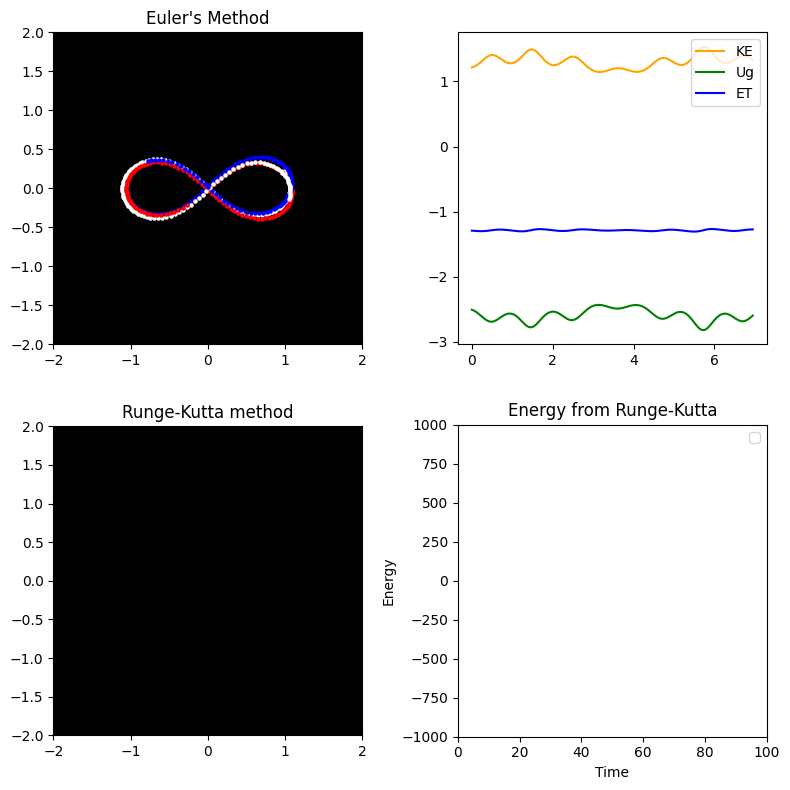

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import display, clear_output
import time

# Fixed values for gravitational constant and masses
G = 1.0
m1, m2, m3 = 1.0, 1.0, 1.0

class Planet:
    def __init__(self, mass, pos, radius=0.1, v=[0, 0]):
        self.mass = mass
        self.pos = np.array(pos, dtype=float)
        self.v = np.array(v, dtype=float)
        self.radius = radius

def gravity_acceleration(planet1, planet2):
    d = planet2.pos - planet1.pos
    r = np.linalg.norm(d)
    if r <= (planet1.radius + planet2.radius):
        raise ValueError('Collision has occurred!')
    magnitude = (G * planet1.mass * planet2.mass) / r**2
    vector = magnitude * d / r
    a = vector / planet1.mass
    return a

def update_position(planet, dt):
    planet.pos += planet.v * dt
    np.append(new_array,planet.pos)
    print(planet.pos)

def KE(planets):
    return sum(0.5 * planet.mass * np.linalg.norm(planet.v)**2 for planet in planets)

def U(planets):
    return sum(
        -G * planets[i].mass * planets[j].mass / np.linalg.norm(planets[i].pos - planets[j].pos)
        for i in range(len(planets)) for j in range(i + 1, len(planets))
    )

def three_body_eq(t, y, G, m1, m2, m3):
    x1, y1, x2, y2, x3, y3 = y[0:6]
    vx1, vy1, vx2, vy2, vx3, vy3 = y[6:12]
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    
    ax1 = G * m2 * (x2 - x1) / r12**3 + G * m3 * (x3 - x1) / r13**3
    ay1 = G * m2 * (y2 - y1) / r12**3 + G * m3 * (y3 - y1) / r13**3
    
    ax2 = G * m1 * (x1 - x2) / r12**3 + G * m3 * (x3 - x2) / r23**3
    ay2 = G * m1 * (y1 - y2) / r12**3 + G * m3 * (y3 - y2) / r23**3
    
    ax3 = G * m1 * (x1 - x3) / r13**3 + G * m2 * (x2 - x3) / r23**3
    ay3 = G * m1 * (y1 - y3) / r13**3 + G * m2 * (y2 - y3) / r23**3
    
    return [vx1, vy1, vx2, vy2, vx3, vy3, ax1, ay1, ax2, ay2, ax3, ay3]

def setup(planetList):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
    
    ax1.set_ylim((-2, 2))
    ax1.set_xlim((-2, 2))
    ax1.set_title("Euler's Method")
    ax1.set_facecolor('black')

    ax2.set_title('Energy form Euler')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Energy')
    ax2.set_ylim((-1000, 1000))
    ax2.set_xlim((0, 100))
    ax2.legend(['KE', 'Ug', 'ET'], loc='upper right')

    ax3.set_title("Runge-Kutta method")
    ax3.set_xlim(-2, 2)
    ax3.set_ylim(-2, 2)
    ax3.set_aspect('equal')
    ax3.set_facecolor('black')

    ax4.set_title('Energy from Runge-Kutta')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Energy')
    ax4.set_ylim((-1000, 1000))
    ax4.set_xlim((0, 100))
    ax4.legend(['KE', 'Ug', 'ET'], loc='upper right')
    plt.tight_layout() 
    return fig, ax1, ax2, ax3, ax4
new_array = np.array 
def animate(planet1, planet2, planet3, dt, iterations):
    fig, ax1, ax2, ax3, ax4 = setup([planet1, planet2, planet3])
    kinetic = []
    potential = []
    
    # Initialize arrays to store positions of the planets
    planet1_positions = []
    planet2_positions = []
    planet3_positions = []

    # Run the simulation loop
    for iteration in range(iterations):
        a12 = gravity_acceleration(planet1, planet2)
        a21 = gravity_acceleration(planet2, planet1)
        a13 = gravity_acceleration(planet1, planet3)
        a31 = gravity_acceleration(planet3, planet1)
        a23 = gravity_acceleration(planet2, planet3)
        a32 = gravity_acceleration(planet3, planet2)

        # Update velocities
        planet1.v += (a12 + a13) * dt
        planet2.v += (a21 + a23) * dt
        planet3.v += (a31 + a32) * dt

        # Update positions
        update_position(planet1, dt)
        update_position(planet2, dt)
        update_position(planet3, dt)

        # Store positions into the arrays
        planet1_positions.append(planet1.pos.copy())
        planet2_positions.append(planet2.pos.copy())
        planet3_positions.append(planet3.pos.copy())

        # Visualization logic (as in your original code)
        ax1.scatter(planet1.pos[0], planet1.pos[1], color='white', s=planet1.radius * 50)
        ax1.scatter(planet2.pos[0], planet2.pos[1], color='red', s=planet2.radius * 50)
        ax1.scatter(planet3.pos[0], planet3.pos[1], color='blue', s=planet3.radius * 50)

        # Energy calculations (as in your original code)
        Kt = KE([planet1, planet2, planet3])
        Ut = U([planet1, planet2, planet3])
        kinetic.append(Kt)
        potential.append(Ut)

        # Update plots
        ax2.clear()
        ax2.plot(np.arange(iteration + 1) * dt, kinetic, label='KE', c='orange')
        ax2.plot(np.arange(iteration + 1) * dt, potential, label='Ug', c='g')
        ax2.plot(np.arange(iteration + 1) * dt, np.array(kinetic) + np.array(potential), label='ET', c='b')
        ax2.legend(loc='upper right')

        display(fig)
        clear_output(wait=True)
        time.sleep(0.01)

    plt.close()

    # Convert the position lists to numpy arrays for easier manipulation
    planet1_positions = np.array(planet1_positions)
    planet2_positions = np.array(planet2_positions)
    planet3_positions = np.array(planet3_positions)
    
    return planet1_positions, planet2_positions, planet3_positions

sun = Planet(1, (0.970, 0.243), radius=0.1, v=[0.466, -0.4320])
mars = Planet(1, (-0.970, -0.243), radius=0.1, v=[0.466, -0.432])
moon = Planet(1, (0.0, 0.0), radius=0.1, v=[-2 * 0.466, 2 * 0.432])

e1, e2, e3 = animate(sun, mars, moon, 0.05, 140)

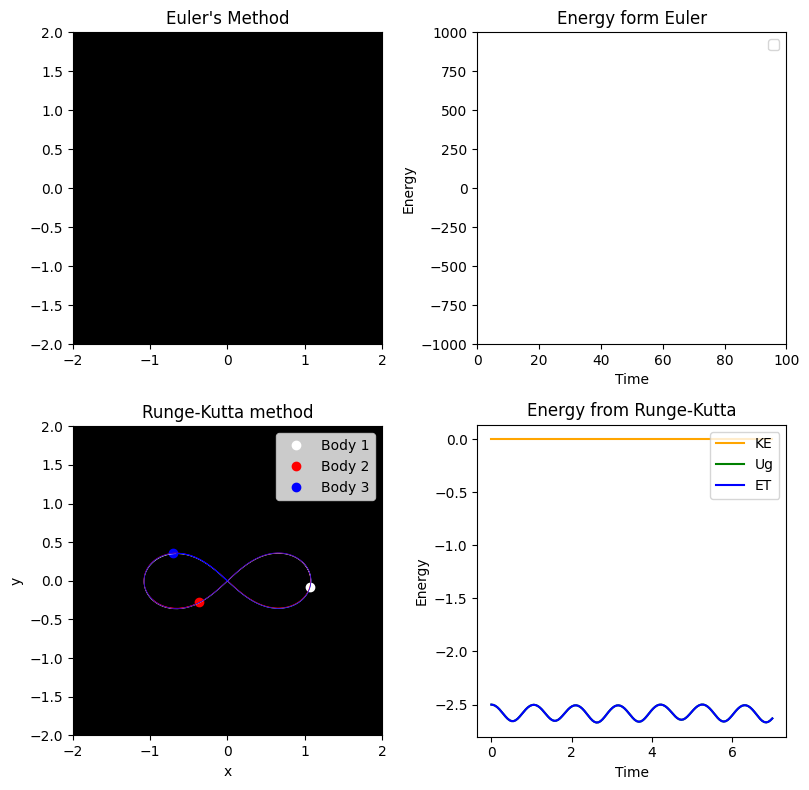

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import display, clear_output
import time

# Fixed values for gravitational constant and masses
G = 1.0
m1, m2, m3 = 1.0, 1.0, 1.0

class Planet:
    def __init__(self, mass, pos, radius=0.1, v=[0, 0]):
        self.mass = mass
        self.pos = np.array(pos, dtype=float)
        self.v = np.array(v, dtype=float)
        self.radius = radius

def gravity_acceleration(planet1, planet2):
    d = planet2.pos - planet1.pos
    r = np.linalg.norm(d)
    if r <= (planet1.radius + planet2.radius):
        raise ValueError('Collision has occurred!')
    magnitude = (G * planet1.mass * planet2.mass) / r**2
    vector = magnitude * d / r
    a = vector / planet1.mass
    return a

def update_position(planet, dt):
    planet.pos += planet.v * dt
    np.append(new_array,planet.pos)
    print(planet.pos)

def KE(planets):
    return sum(0.5 * planet.mass * np.linalg.norm(planet.v)**2 for planet in planets)

def U(planets):
    return sum(
        -G * planets[i].mass * planets[j].mass / np.linalg.norm(planets[i].pos - planets[j].pos)
        for i in range(len(planets)) for j in range(i + 1, len(planets))
    )

def three_body_eq(t, y, G, m1, m2, m3):
    x1, y1, x2, y2, x3, y3 = y[0:6]
    vx1, vy1, vx2, vy2, vx3, vy3 = y[6:12]
    r12 = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    r13 = np.sqrt((x3 - x1)**2 + (y3 - y1)**2)
    r23 = np.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    
    ax1 = G * m2 * (x2 - x1) / r12**3 + G * m3 * (x3 - x1) / r13**3
    ay1 = G * m2 * (y2 - y1) / r12**3 + G * m3 * (y3 - y1) / r13**3
    
    ax2 = G * m1 * (x1 - x2) / r12**3 + G * m3 * (x3 - x2) / r23**3
    ay2 = G * m1 * (y1 - y2) / r12**3 + G * m3 * (y3 - y2) / r23**3
    
    ax3 = G * m1 * (x1 - x3) / r13**3 + G * m2 * (x2 - x3) / r23**3
    ay3 = G * m1 * (y1 - y3) / r13**3 + G * m2 * (y2 - y3) / r23**3
    
    return [vx1, vy1, vx2, vy2, vx3, vy3, ax1, ay1, ax2, ay2, ax3, ay3]

def setup(planetList):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
    
    ax1.set_ylim((-2, 2))
    ax1.set_xlim((-2, 2))
    ax1.set_title("Euler's Method")
    ax1.set_facecolor('black')

    ax2.set_title('Energy form Euler')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Energy')
    ax2.set_ylim((-1000, 1000))
    ax2.set_xlim((0, 100))
    ax2.legend(['KE', 'Ug', 'ET'], loc='upper right')

    ax3.set_title("Runge-Kutta method")
    ax3.set_xlim(-2, 2)
    ax3.set_ylim(-2, 2)
    ax3.set_aspect('equal')
    ax3.set_facecolor('black')

    ax4.set_title('Energy from Runge-Kutta')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Energy')
    ax4.set_ylim((-1000, 1000))
    ax4.set_xlim((0, 100))
    ax4.legend(['KE', 'Ug', 'ET'], loc='upper right')
    plt.tight_layout() 
    return fig, ax1, ax2, ax3, ax4
new_array = np.array 
def animate(planet1, planet2, planet3, dt, iterations):
    fig, ax1, ax2, ax3, ax4 = setup([planet1, planet2, planet3])
    kinetic = []
    potential = []

    # Initial conditions for Runge-Kutta method
    x1, y1 = 0.970, 0.243
    x2, y2 = -0.970, -0.243
    x3, y3 = 0.0, 0.0
    vx1, vy1 = 0.466, -0.432
    vx2, vy2 = 0.466, -0.432
    vx3, vy3 = -2 * 0.466, 2 * 0.432
    y0 = [x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3]

    # Solve the three-body problem using Runge-Kutta (via solve_ivp)
    t_span = (0, dt * iterations)  # Total simulation time
    t_eval = np.linspace(*t_span, iterations)  # Time steps for evaluation
    solution = solve_ivp(three_body_eq, t_span, y0, args=(G, m1, m2, m3), t_eval=t_eval, rtol=1e-9)

    # Extract positions from Runge-Kutta solution
    x1_sol, y1_sol = solution.y[0], solution.y[1]
    x2_sol, y2_sol = solution.y[2], solution.y[3]
    x3_sol, y3_sol = solution.y[4], solution.y[5]

    # Combine positions into arrays for easier manipulation
    planet1_positions = np.column_stack((x1_sol, y1_sol))
    planet2_positions = np.column_stack((x2_sol, y2_sol))
    planet3_positions = np.column_stack((x3_sol, y3_sol))

    # Animation loop
    for iteration in range(iterations):
        # Visualization logic (Runge-Kutta positions)
        ax3.clear()
        ax3.set_xlim(-2, 2)
        ax3.set_ylim(-2, 2)
        ax3.set_aspect('equal')

        # Plot the current positions of the planets
        ax3.plot(x1_sol[iteration], y1_sol[iteration], 'wo', label="Body 1")
        ax3.plot(x2_sol[iteration], y2_sol[iteration], 'ro', label="Body 2")
        ax3.plot(x3_sol[iteration], y3_sol[iteration], 'bo', label="Body 3")

        # Plot the trajectories so far
        ax3.plot(x1_sol[:iteration], y1_sol[:iteration], 'w-', lw=0.5)
        ax3.plot(x2_sol[:iteration], y2_sol[:iteration], 'r-', lw=0.5)
        ax3.plot(x3_sol[:iteration], y3_sol[:iteration], 'b-', lw=0.5)

        ax3.legend()
        ax3.set_title("Runge-Kutta method")
        ax3.set_xlabel("x")
        ax3.set_ylabel("y")

        # Calculate energies (for the Runge-Kutta positions)
        planet_positions = [
            Planet(m1, [x1_sol[iteration], y1_sol[iteration]]),
            Planet(m2, [x2_sol[iteration], y2_sol[iteration]]),
            Planet(m3, [x3_sol[iteration], y3_sol[iteration]])
        ]

        Kt = KE(planet_positions)
        Ut = U(planet_positions)
        kinetic.append(Kt)
        potential.append(Ut)

        # Update energy plot
        ax4.clear()
        ax4.plot(t_eval[:iteration + 1], kinetic, label='KE', color='orange')
        ax4.plot(t_eval[:iteration + 1], potential, label='Ug', color='green')
        ax4.plot(t_eval[:iteration + 1], np.array(kinetic) + np.array(potential), label='ET', color='blue')
        ax4.set_title('Energy from Runge-Kutta')
        ax4.legend(loc='upper right')
        ax4.set_xlabel('Time')
        ax4.set_ylabel('Energy')

        display(fig)
        clear_output(wait=True)
        time.sleep(0.01)

    plt.close()

    # Return positions as arrays
    return planet1_positions, planet2_positions, planet3_positions


sun = Planet(1, (0.970, 0.243), radius=0.1, v=[0.466, -0.4320])
mars = Planet(1, (-0.970, -0.243), radius=0.1, v=[0.466, -0.432])
moon = Planet(1, (0.0, 0.0), radius=0.1, v=[-2 * 0.466, 2 * 0.432])

rk1, rk2, rk3 = animate(sun, mars, moon, 0.05, 140)

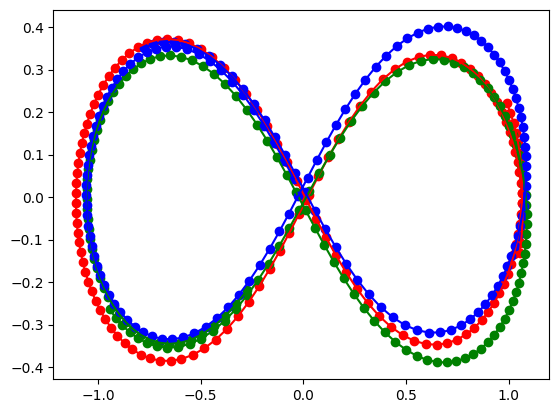

In [84]:
plt.plot(e1[0:,0],e1[0:,1], color = "r")
plt.plot(e2[0:,0],e2[0:,1], color = "g")
plt.plot(e3[0:,0],e3[0:,1], color = "b")
plt.scatter(e1[0:,0],e1[0:,1], color = "r")
plt.scatter(e2[0:,0],e2[0:,1], color = "g")
plt.scatter(e3[0:,0],e3[0:,1], color = "b")

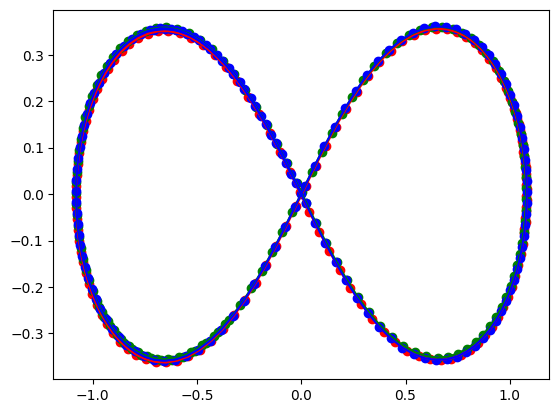

In [90]:
plt.plot(rk1[0:,0],rk1[0:,1], color = "r")
plt.plot(rk2[0:,0],rk2[0:,1], color = "g")
plt.plot(rk3[0:,0],rk3[0:,1], color = "b")
plt.scatter(rk1[0:,0],rk1[0:,1], color = "r")
plt.scatter(rk2[0:,0],rk2[0:,1], color = "g")
plt.scatter(rk3[0:,0],rk3[0:,1], color = "b")